In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
%run "pymol_and_pdb_functions.py"

In [3]:
%run "\Users\Elisenda\GFP_global_landscape\analysis\louisa\lgs01a_functions_for_getting_aa_pseudopositions.ipynb"

In [4]:
start_pymol()

In [5]:
def get_native_position(gene, pseudoposition):
    all_genes = ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP']
    gene_index = dict(zip(all_genes, range(4)))
    return pseudopos_to_nativepos[pseudoposition][gene_index[gene]]

def get_native_aa(gene, pseudoposition):
    all_genes = ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP']
    gene_index = dict(zip(all_genes, range(4)))
    return pseudopos_to_nativeaa[pseudoposition][gene_index[gene]]

def get_PDB_position(gene, pseudoposition):
    all_genes = ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP']
    gene_structures = ['2wur.pdb', 'amacGFP_prediction.pdb', '2hpw.pdb', '2g3o.pdb']
    gene_index = dict(zip(all_genes, range(4)))
    gene_coefficients = dict(zip(all_genes, [1,1,1,1])) # shifts to add to native positions to get PDB numbering
    return pseudopos_to_nativepos[pseudoposition][gene_index[gene]] + gene_coefficients[gene]

def PDB_to_pseudo_position(gene, pdbposition):
    all_genes = ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP']
    gene_structures = ['2wur.pdb', 'amacGFP_prediction.pdb', '2hpw.pdb', '2g3o.pdb']
    gene_index = dict(zip(all_genes, range(4)))
    gene_coefficients = dict(zip(all_genes, [1,1,1,1])) # shifts to add to native positions to get PDB numbering
    return nativepos_to_pseudopos[pdbposition][gene_index[gene]] - gene_coefficients[gene] 

gene_structures = dict(zip(['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP'], 
                      ['2wur.pdb', 'amacGFP_prediction.pdb', '2hpw.pdb', '2g3o.pdb']))

In [6]:
inner_PDB_pos_list = [8,12,14,16,18,20,27,29,31,33,35,40,42,44,46,48,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,82,83,84,85,86,87,88,92,94,96,98,100,106,108,110,112,114,119,121,123,125,127,130,141,143,145,148,150,152,161,163,165,167,169,179,181,183,185,199,201,203,205,207,218,220,222,224,226]
inner_PDB_pos_df = pd.DataFrame (inner_PDB_pos_list,columns=['PDB_avGFP'])
inner_PDB_pos_df['pseudo_avGFP'] = inner_PDB_pos_df.apply(lambda x: PDB_to_pseudo_position('avGFP', x['PDB_avGFP']), axis=1)
inner_PDB_pos_df['PDB_amacGFP'] = inner_PDB_pos_df.apply(lambda x: get_PDB_position('amacGFP', x['pseudo_avGFP']), axis=1)
inner_PDB_pos_df['PDB_cgreGFP'] = inner_PDB_pos_df.apply(lambda x: get_PDB_position('cgreGFP', x['pseudo_avGFP']), axis=1)
inner_PDB_pos_df['PDB_ppluGFP'] = inner_PDB_pos_df.apply(lambda x: get_PDB_position('ppluGFP', x['pseudo_avGFP']), axis=1)

inner_PDB_pos_df

,PDB_avGFP,pseudo_avGFP,PDB_amacGFP,PDB_cgreGFP,PDB_ppluGFP
0,8,10,8.0,11.0,NaN
1,12,14,12.0,15.0,4.0
2,14,16,14.0,17.0,6.0
3,16,18,16.0,19.0,8.0
4,18,20,18.0,21.0,10.0
...,...,...,...,...,...
79,218,225,218.0,220.0,206.0
80,220,227,220.0,222.0,208.0
81,222,229,222.0,224.0,210.0
82,224,231,224.0,226.0,212.0


In [7]:
dfNew_total_amac_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\amac_percentage_final.csv')
dfNew_total_amac_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\amac_percentage_final.csv')

dfNew_total_amac_final['variance']=dfNew_total_amac_final['stdev']*dfNew_total_amac_final['stdev']
dfNew_total_amac_thres['variance']=dfNew_total_amac_thres['stdev']*dfNew_total_amac_thres['stdev']

In [8]:
dfNew_total_amac_final['pdb_pos']=""
position_total_amac={}

for index, row in dfNew_total_amac_final.iterrows():
    pos= row['position']
    dfNew_total_amac_final['pdb_pos'][index] = get_PDB_position('amacGFP', pos)
dfNew_total_amac_final

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos
0,727,64,-1.774867,-1.728615,T64N,9,0.181266,T61N,0.0,0.0,0.0,1.0,0.032857,62
1,17467,158,-0.159944,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155
2,356,158,-0.104052,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155
3,2086,158,-0.258328,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155
4,17435,158,-0.360039,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19726,21679,170,0.230902,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167
19727,19280,170,0.212539,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167
19728,17613,170,0.066507,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167
19729,20320,152,0.273383,0.176377,N152K,6,0.077564,N148K,1.0,6.0,1.0,0.0,0.006016,149


In [9]:
dfNew_total_amac_thres['pdb_pos']=""
position_total_amac={}

for index, row in dfNew_total_amac_thres.iterrows():
    pos= row['position']
    dfNew_total_amac_thres['pdb_pos'][index] = get_PDB_position('amacGFP', pos)
dfNew_total_amac_thres

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos
0,727,64,-1.774867,-1.728615,T64N,9,0.181266,T61N,0.0,0.0,0.0,1.0,0.032857,62
1,17467,158,-0.159944,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155
2,356,158,-0.104052,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155
3,2086,158,-0.258328,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155
4,17435,158,-0.360039,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19726,21679,170,0.230902,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167
19727,19280,170,0.212539,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167
19728,17613,170,0.066507,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167
19729,20320,152,0.273383,0.176377,N152K,6,0.077564,N148K,1.0,6.0,1.0,0.0,0.006016,149


In [10]:
dfNew_total_amac_final['median_new']=dfNew_total_amac_final['median']
dfNew_total_amac_thres['median_new']=dfNew_total_amac_thres['median']

In [11]:
s=set(inner_PDB_pos_df.PDB_amacGFP.values)
dfNew_total_amac_final['inner_outer']=""

for index, row in dfNew_total_amac_final.iterrows():
    pos= row['pdb_pos']
    if pos in s:
        dfNew_total_amac_final['inner_outer'][index] = 'inner'
    else:
        dfNew_total_amac_final['inner_outer'][index] = 'outer'
dfNew_total_amac_final

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos,median_new,inner_outer
0,727,64,-1.774867,-1.728615,T64N,9,0.181266,T61N,0.0,0.0,0.0,1.0,0.032857,62,-1.728615,inner
1,17467,158,-0.159944,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155,-0.156100,outer
2,356,158,-0.104052,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155,-0.156100,outer
3,2086,158,-0.258328,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155,-0.156100,outer
4,17435,158,-0.360039,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155,-0.156100,outer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19726,21679,170,0.230902,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167,0.239361,inner
19727,19280,170,0.212539,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167,0.239361,inner
19728,17613,170,0.066507,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167,0.239361,inner
19729,20320,152,0.273383,0.176377,N152K,6,0.077564,N148K,1.0,6.0,1.0,0.0,0.006016,149,0.176377,outer


In [12]:
s=set(inner_PDB_pos_df.PDB_amacGFP.values)
dfNew_total_amac_thres['inner_outer']=""

for index, row in dfNew_total_amac_thres.iterrows():
    pos= row['pdb_pos']
    if pos in s:
        dfNew_total_amac_thres['inner_outer'][index] = 'inner'
    else:
        dfNew_total_amac_thres['inner_outer'][index] = 'outer'
dfNew_total_amac_thres

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos,median_new,inner_outer
0,727,64,-1.774867,-1.728615,T64N,9,0.181266,T61N,0.0,0.0,0.0,1.0,0.032857,62,-1.728615,inner
1,17467,158,-0.159944,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155,-0.156100,outer
2,356,158,-0.104052,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155,-0.156100,outer
3,2086,158,-0.258328,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155,-0.156100,outer
4,17435,158,-0.360039,-0.156100,D158V,24,0.284236,D154V,0.0,0.0,0.0,1.0,0.080790,155,-0.156100,outer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19726,21679,170,0.230902,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167,0.239361,inner
19727,19280,170,0.212539,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167,0.239361,inner
19728,17613,170,0.066507,0.239361,I170V,20,0.050041,I166V,1.0,20.0,1.0,0.0,0.002504,167,0.239361,inner
19729,20320,152,0.273383,0.176377,N152K,6,0.077564,N148K,1.0,6.0,1.0,0.0,0.006016,149,0.176377,outer


In [13]:
dfNew_total_amac_final=dfNew_total_amac_final.drop_duplicates(['mutation'])
dfNew_total_amac_thres=dfNew_total_amac_thres.drop_duplicates(['mutation'])

In [14]:
dfNew_total_cgre_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\cgre_percentage_final.csv')
dfNew_total_cgre_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\cgre_percentage_final.csv')

dfNew_total_cgre_final['variance']=dfNew_total_cgre_final['stdev']*dfNew_total_cgre_final['stdev']
dfNew_total_cgre_thres['variance']=dfNew_total_cgre_thres['stdev']*dfNew_total_cgre_thres['stdev']

In [15]:
dfNew_total_cgre_final['pdb_pos']=""
position_total_cgre={}

for index, row in dfNew_total_cgre_final.iterrows():
    pos= row['position']
    dfNew_total_cgre_final['pdb_pos'][index] = get_PDB_position('cgreGFP', pos)
dfNew_total_cgre_final

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos
0,13339,211,-1.700245,-2.275411,T211A,10,0.443297,T205A,0.0,0.0,0.0,1.0,0.196512,206
1,39675,21,-0.924189,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22
2,15021,21,-0.102773,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22
3,12642,21,-0.114780,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22
4,12641,21,-0.109639,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17615,14141,170,0.093942,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168
17616,14242,170,0.114928,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168
17617,14381,170,0.125521,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168
17618,3865,170,0.099009,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168


In [16]:
dfNew_total_cgre_thres['pdb_pos']=""
position_total_cgre={}

for index, row in dfNew_total_cgre_thres.iterrows():
    pos= row['position']
    dfNew_total_cgre_thres['pdb_pos'][index] = get_PDB_position('cgreGFP', pos)
dfNew_total_cgre_thres

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos
0,13339,211,-1.700245,-2.275411,T211A,10,0.443297,T205A,0.0,0.0,0.0,1.0,0.196512,206
1,39675,21,-0.924189,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22
2,15021,21,-0.102773,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22
3,12642,21,-0.114780,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22
4,12641,21,-0.109639,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17615,14141,170,0.093942,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168
17616,14242,170,0.114928,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168
17617,14381,170,0.125521,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168
17618,3865,170,0.099009,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168


In [17]:
dfNew_total_cgre_final['median_new']=dfNew_total_cgre_final['median']
dfNew_total_cgre_thres['median_new']=dfNew_total_cgre_thres['median']

In [18]:
s=set(inner_PDB_pos_df.PDB_cgreGFP.values)
dfNew_total_cgre_final['inner_outer']=""

for index, row in dfNew_total_cgre_final.iterrows():
    pos= row['pdb_pos']
    if pos in s:
        dfNew_total_cgre_final['inner_outer'][index] = 'inner'
    else:
        dfNew_total_cgre_final['inner_outer'][index] = 'outer'
dfNew_total_cgre_final

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos,median_new,inner_outer
0,13339,211,-1.700245,-2.275411,T211A,10,0.443297,T205A,0.0,0.0,0.0,1.0,0.196512,206,-2.275411,inner
1,39675,21,-0.924189,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22,-0.110926,outer
2,15021,21,-0.102773,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22,-0.110926,outer
3,12642,21,-0.114780,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22,-0.110926,outer
4,12641,21,-0.109639,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22,-0.110926,outer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17615,14141,170,0.093942,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168,0.113817,inner
17616,14242,170,0.114928,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168,0.113817,inner
17617,14381,170,0.125521,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168,0.113817,inner
17618,3865,170,0.099009,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168,0.113817,inner


In [19]:
s=set(inner_PDB_pos_df.PDB_cgreGFP.values)
dfNew_total_cgre_thres['inner_outer']=""

for index, row in dfNew_total_cgre_thres.iterrows():
    pos= row['pdb_pos']
    if pos in s:
        dfNew_total_cgre_thres['inner_outer'][index] = 'inner'
    else:
        dfNew_total_cgre_thres['inner_outer'][index] = 'outer'
dfNew_total_cgre_thres

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos,median_new,inner_outer
0,13339,211,-1.700245,-2.275411,T211A,10,0.443297,T205A,0.0,0.0,0.0,1.0,0.196512,206,-2.275411,inner
1,39675,21,-0.924189,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22,-0.110926,outer
2,15021,21,-0.102773,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22,-0.110926,outer
3,12642,21,-0.114780,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22,-0.110926,outer
4,12641,21,-0.109639,-0.110926,E21G,38,0.368159,E21G,0.0,0.0,0.0,1.0,0.135541,22,-0.110926,outer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17615,14141,170,0.093942,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168,0.113817,inner
17616,14242,170,0.114928,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168,0.113817,inner
17617,14381,170,0.125521,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168,0.113817,inner
17618,3865,170,0.099009,0.113817,K170M,28,0.151698,K167M,1.0,28.0,1.0,0.0,0.023012,168,0.113817,inner


In [20]:
dfNew_total_cgre_final=dfNew_total_cgre_final.drop_duplicates(['mutation'])
dfNew_total_cgre_thres=dfNew_total_cgre_thres.drop_duplicates(['mutation'])

In [21]:
dfNew_total_pplu_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\pplu_percentage_final.csv')
dfNew_total_pplu_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\pplu_percentage_final.csv')

dfNew_total_pplu_final['variance']=dfNew_total_pplu_final['stdev']*dfNew_total_pplu_final['stdev']
dfNew_total_pplu_thres['variance']=dfNew_total_pplu_thres['stdev']*dfNew_total_pplu_thres['stdev']

In [22]:
dfNew_total_pplu_final['pdb_pos']=""
position_total_pplu={}

for index, row in dfNew_total_pplu_final.iterrows():
    pos= row['position']
    dfNew_total_pplu_final['pdb_pos'][index] = get_PDB_position('ppluGFP', pos)
dfNew_total_pplu_final

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos
0,37259,69,-1.642609,-1.685785,G69A,8,0.254323,G58A,0.0,0.0,0.0,1.0,0.064680,59
1,11143,124,-0.185129,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112
2,7628,124,-0.119782,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112
3,8270,124,-1.483957,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112
4,9609,124,-0.215213,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33234,17704,226,0.101338,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207
33235,65680,226,0.041747,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207
33236,1497,226,0.185298,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207
33237,65699,226,0.232284,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207


In [23]:
dfNew_total_pplu_thres['pdb_pos']=""
position_total_pplu={}

for index, row in dfNew_total_pplu_thres.iterrows():
    pos= row['position']
    dfNew_total_pplu_thres['pdb_pos'][index] = get_PDB_position('ppluGFP', pos)
dfNew_total_pplu_thres

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos
0,37259,69,-1.642609,-1.685785,G69A,8,0.254323,G58A,0.0,0.0,0.0,1.0,0.064680,59
1,11143,124,-0.185129,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112
2,7628,124,-0.119782,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112
3,8270,124,-1.483957,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112
4,9609,124,-0.215213,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33234,17704,226,0.101338,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207
33235,65680,226,0.041747,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207
33236,1497,226,0.185298,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207
33237,65699,226,0.232284,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207


In [24]:
dfNew_total_pplu_final['median_new']=dfNew_total_pplu_final['median']
dfNew_total_pplu_thres['median_new']=dfNew_total_pplu_thres['median']

In [25]:
s=set(inner_PDB_pos_df.PDB_ppluGFP.values)
dfNew_total_pplu_final['inner_outer']=""

for index, row in dfNew_total_pplu_final.iterrows():
    pos= row['pdb_pos']
    if pos in s:
        dfNew_total_pplu_final['inner_outer'][index] = 'inner'
    else:
        dfNew_total_pplu_final['inner_outer'][index] = 'outer'
dfNew_total_pplu_final

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos,median_new,inner_outer
0,37259,69,-1.642609,-1.685785,G69A,8,0.254323,G58A,0.0,0.0,0.0,1.0,0.064680,59,-1.685785,inner
1,11143,124,-0.185129,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112,-0.185218,inner
2,7628,124,-0.119782,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112,-0.185218,inner
3,8270,124,-1.483957,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112,-0.185218,inner
4,9609,124,-0.215213,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112,-0.185218,inner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33234,17704,226,0.101338,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207,0.134618,outer
33235,65680,226,0.041747,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207,0.134618,outer
33236,1497,226,0.185298,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207,0.134618,outer
33237,65699,226,0.232284,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207,0.134618,outer


In [26]:
s=set(inner_PDB_pos_df.PDB_ppluGFP.values)
dfNew_total_pplu_thres['inner_outer']=""

for index, row in dfNew_total_pplu_thres.iterrows():
    pos= row['pdb_pos']
    if pos in s:
        dfNew_total_pplu_thres['inner_outer'][index] = 'inner'
    else:
        dfNew_total_pplu_thres['inner_outer'][index] = 'outer'
dfNew_total_pplu_thres

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage,variance,pdb_pos,median_new,inner_outer
0,37259,69,-1.642609,-1.685785,G69A,8,0.254323,G58A,0.0,0.0,0.0,1.0,0.064680,59,-1.685785,inner
1,11143,124,-0.185129,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112,-0.185218,inner
2,7628,124,-0.119782,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112,-0.185218,inner
3,8270,124,-1.483957,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112,-0.185218,inner
4,9609,124,-0.215213,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0,0.125411,112,-0.185218,inner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33234,17704,226,0.101338,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207,0.134618,outer
33235,65680,226,0.041747,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207,0.134618,outer
33236,1497,226,0.185298,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207,0.134618,outer
33237,65699,226,0.232284,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0,0.004655,207,0.134618,outer


In [27]:
import matplotlib.patches as mpatches
amac_patch=mpatches.Patch(color='deepskyblue',alpha=0.5)
cgre_patch=mpatches.Patch(color='deeppink',alpha=0.5)
pplu_patch=mpatches.Patch(color='blueviolet',alpha=0.5)
patches = [amac_patch,cgre_patch,pplu_patch]
labels = ['amacGFP', 'cgreGFP', 'ppluGFP']

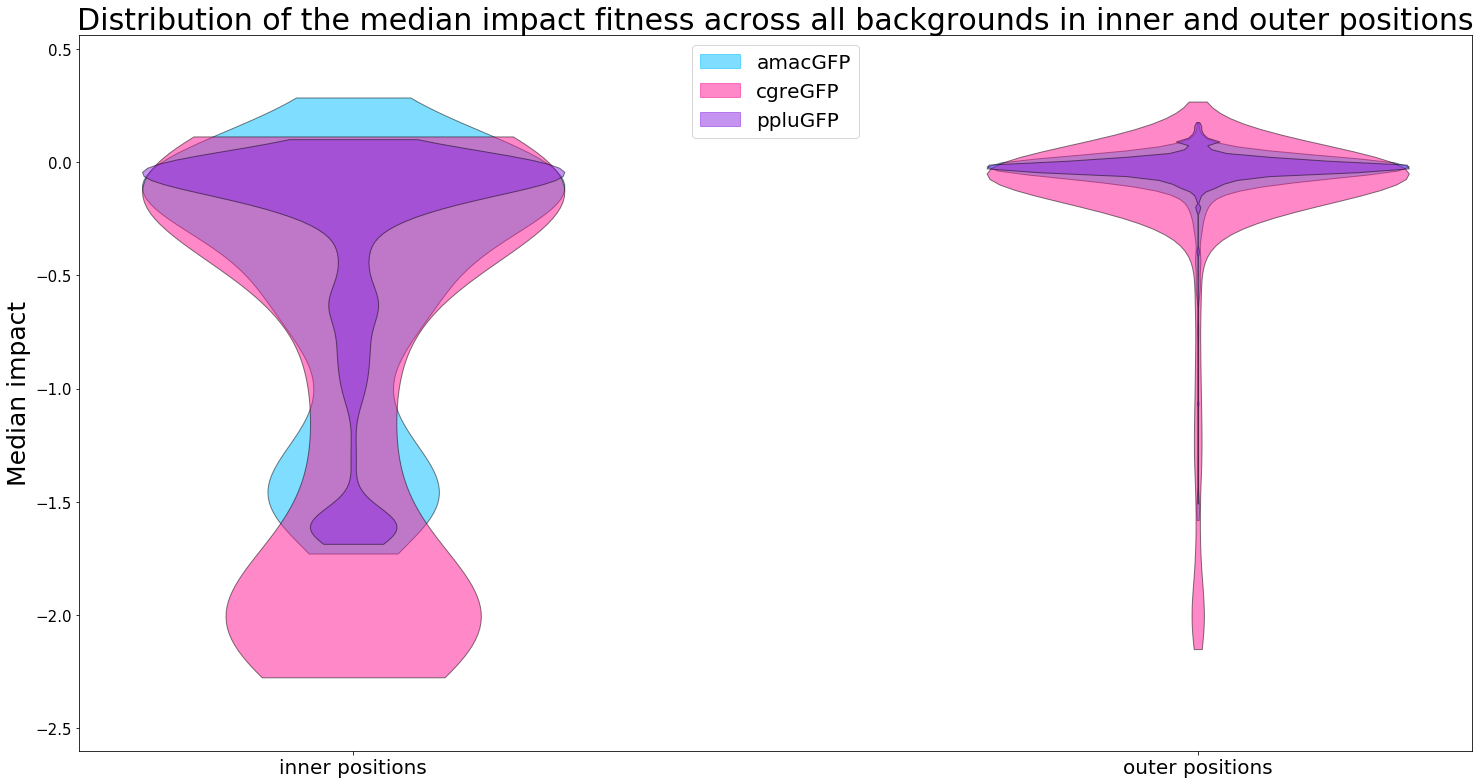

In [49]:
fig, axes = plt.subplots(figsize=(22,11))

parts=axes.violinplot(dataset = [dfNew_total_amac_final[dfNew_total_amac_final.inner_outer == 'inner']["median_new"].values,
                           dfNew_total_amac_final[dfNew_total_amac_final.inner_outer == 'outer']["median_new"].values],showmeans=False, showmedians=False,
        showextrema=False)
parts1=axes.violinplot(dataset = [dfNew_total_cgre_final[dfNew_total_cgre_final.inner_outer == 'inner']["median_new"].values,
                           dfNew_total_cgre_final[dfNew_total_cgre_final.inner_outer == 'outer']["median_new"].values],showmeans=False, showmedians=False,
        showextrema=False)

parts2=axes.violinplot(dataset = [dfNew_total_pplu_final[dfNew_total_pplu_final.inner_outer == 'inner']["median_new"].values,
                           dfNew_total_pplu_final[dfNew_total_pplu_final.inner_outer == 'outer']["median_new"].values],showmeans=False, showmedians=False,
        showextrema=False)

axes.set_xticks([1,2])
axes.set_xticklabels(['inner positions', 'outer positions'],fontsize=10)
axes.set_ylabel('Median impact',fontsize=25)


for pc in parts['bodies']:
    pc.set_facecolor('deepskyblue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

for pc in parts1['bodies']:
    pc.set_facecolor('deeppink')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

for pc in parts2['bodies']:
    pc.set_facecolor('blueviolet')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

axes.set_title('Distribution of the median impact fitness across all backgrounds in inner and outer positions', fontsize=30)
axes.tick_params(axis='y', which='major', labelsize=15)
axes.tick_params(axis='x', which='major', labelsize=20)
axes.set_yticks(np.arange(-2.5, 1, step=0.5));
axes.set_ylim(ymin=-2.6,ymax=0.56)

axes.legend(patches,labels, fontsize=20,loc='upper center')

fig.tight_layout()
plt.savefig('all_violin_impact_inout_final.png', dpi=300)

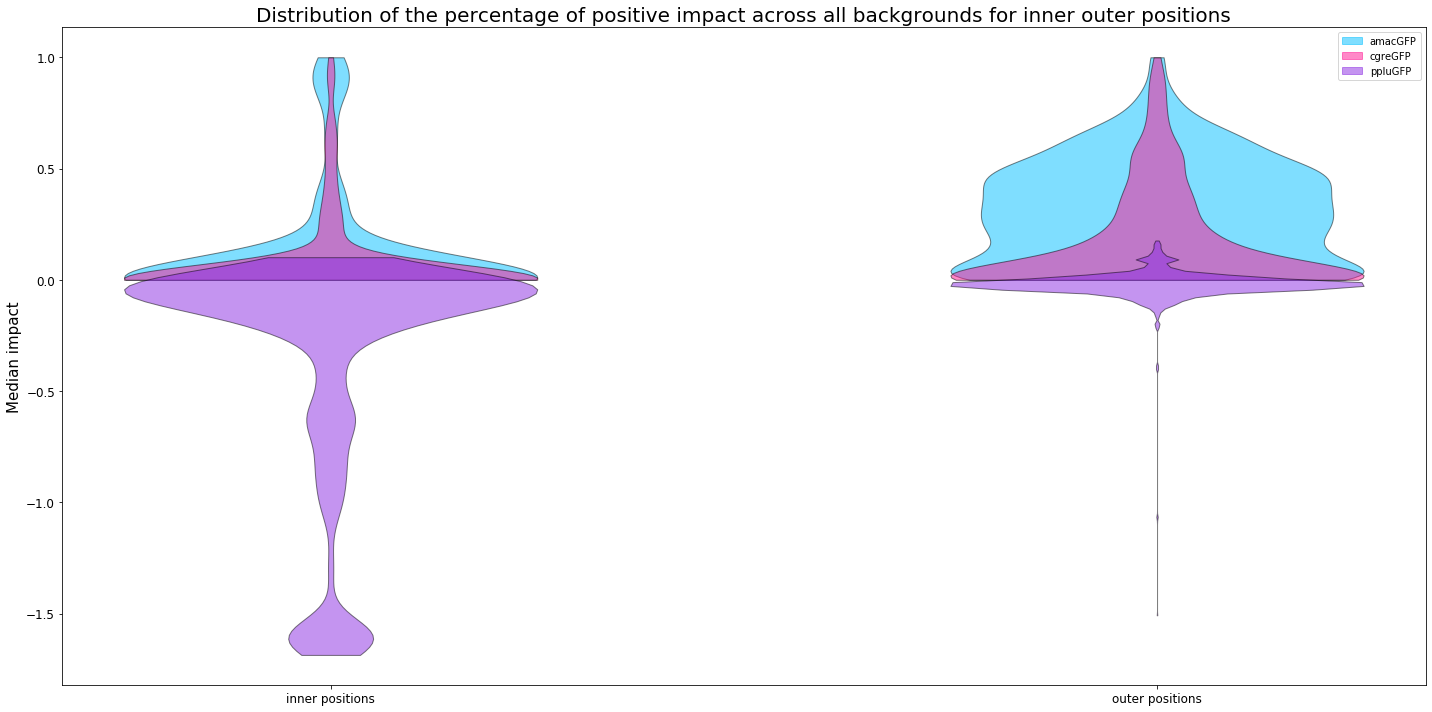

In [29]:
fig, axes = plt.subplots(figsize=(20,10))

parts=axes.violinplot(dataset = [dfNew_total_amac_final[dfNew_total_amac_final.inner_outer == 'inner']["ben_percentage"].values,
                           dfNew_total_amac_final[dfNew_total_amac_final.inner_outer == 'outer']["ben_percentage"].values],showmeans=False, showmedians=False,
        showextrema=False)
parts1=axes.violinplot(dataset = [dfNew_total_cgre_final[dfNew_total_cgre_final.inner_outer == 'inner']["ben_percentage"].values,
                           dfNew_total_cgre_final[dfNew_total_cgre_final.inner_outer == 'outer']["ben_percentage"].values],showmeans=False, showmedians=False,
        showextrema=False)

parts2=axes.violinplot(dataset = [dfNew_total_pplu_final[dfNew_total_pplu_final.inner_outer == 'inner']["median_new"].values,
                           dfNew_total_pplu_final[dfNew_total_pplu_final.inner_outer == 'outer']["median_new"].values],showmeans=False, showmedians=False,
        showextrema=False)

axes.set_xticks([1,2])
axes.set_xticklabels(['inner positions', 'outer positions'],fontsize=15)
axes.set_ylabel('Median impact',fontsize=15)

for pc in parts['bodies']:
    pc.set_facecolor('deepskyblue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

for pc in parts1['bodies']:
    pc.set_facecolor('deeppink')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

for pc in parts2['bodies']:
    pc.set_facecolor('blueviolet')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

axes.set_title('Distribution of the percentage of positive impact across all backgrounds for inner outer positions', fontsize=20)
axes.tick_params(axis='both', which='major', labelsize=12)
#axes.set_yticks(np.arange(0, 1.2, step=0.2));
#axes.set_ylim(ymin=-0.1,ymax=1.1)

axes.legend(patches,labels)  

fig.tight_layout()
plt.savefig('all_violin_percentage_inout_final.png', dpi=300)

In [50]:
imp_PDB_pos_list = [96,222,148,163,165,167,203]
imp_PDB_pos_df = pd.DataFrame (imp_PDB_pos_list,columns=['PDB_avGFP'])
imp_PDB_pos_df['pseudo_avGFP'] = imp_PDB_pos_df.apply(lambda x: PDB_to_pseudo_position('avGFP', x['PDB_avGFP']), axis=1)
imp_PDB_pos_df['PDB_amacGFP'] = imp_PDB_pos_df.apply(lambda x: get_PDB_position('amacGFP', x['pseudo_avGFP']), axis=1)
imp_PDB_pos_df['PDB_cgreGFP'] = imp_PDB_pos_df.apply(lambda x: get_PDB_position('cgreGFP', x['pseudo_avGFP']), axis=1)
imp_PDB_pos_df['PDB_ppluGFP'] = imp_PDB_pos_df.apply(lambda x: get_PDB_position('ppluGFP', x['pseudo_avGFP']), axis=1)

imp_PDB_pos_df

,PDB_avGFP,pseudo_avGFP,PDB_amacGFP,PDB_cgreGFP,PDB_ppluGFP
0,96,99,96,97,87
1,222,229,222,224,210
2,148,151,148,149,138
3,163,166,163,164,152
4,165,168,165,166,154
5,167,170,167,168,156
6,203,209,203,204,195
